In [3]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
os.getcwd()

'/Users/sauravanchlia/SWM/BotDetectionUsingTransformers/SVMClassification'

In [2]:
df = pd.read_csv("../dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [6]:
df.head(10)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1
5,7.300000e+17,7.30E+17,glossatory,Australah,SOCIAL ON GLOSSATORY: the branch of the consid...,https://t.co/hcUNcUdlcq,16,1,4,5/11/2016 5:45,0,False,1832,en,"Status(in_reply_to_user_id=None, favorited=Fal...",False,False,False,GLOSSATORY,1
6,8.200000e+17,8.20E+17,Fancypants6047,vancouver,NaN,NaN,41,394,0,13/01/2017 19:37,3,False,4,en,Status(_api=<tweepy.api.API object at 0x101927...,True,False,True,Fancypants,1
7,2.602217e+09,2602217174,Hedgehogize,Moebius,@Hedgehogize me or @Hedgehogize NAME to unlock...,http://t.co/a1UvEiAl3u,549,370,12,Thu Jul 03 20:37:48 +0000 2014,12,False,4658,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,YOU the Hedgehog,1
8,8.330000e+17,8.33E+17,jamieph93986621,NaN,"I wasn't bor ysterday, was born tomorrow",NaN,0,60,0,Sun Feb 19 03:47:42 +0000 2017,0,False,10,en,"{""created_at"": ""Mon Mar 13 02:55:10 +0000 2017...",True,False,False,Jamie Phillips,1
9,8.250000e+17,8.25E+17,NothemDonella,NaN,Your diac No,NaN,0,43,4,Fri Jan 27 15:51:34 +0000 2017,48,False,86,en,"{""created_at"": ""Mon Mar 13 02:52:13 +0000 2017...",True,False,False,Donella Nothem,1


In [7]:
print(ast.literal_eval(df.iloc[0]["status"]).keys())

dict_keys(['retweeted', 'is_quote_status', 'favorite_count', 'retweet_count', 'place', 'in_reply_to_status_id', 'entities', 'geo', 'id_str', 'in_reply_to_screen_name', 'text', 'in_reply_to_user_id_str', 'source', 'truncated', 'in_reply_to_user_id', 'created_at', 'contributors', 'in_reply_to_status_id_str', 'lang', 'id', 'favorited', 'coordinates'])


In [8]:
print(ast.literal_eval(df.iloc[0]["status"]).values())

dict_values([False, False, 0, 0, None, None, {'urls': [], 'user_mentions': [], 'hashtags': [], 'symbols': []}, None, '841319282986237952', None, "It's happening! The End Times! When that machine activates... I gotta get outta town!", None, '<a href="http://twittbot.net/" rel="nofollow">twittbot.net</a>', False, None, 'Mon Mar 13 16:05:22 +0000 2017', None, None, 'en', 841319282986237952, False, None])


In [9]:
df.bot.value_counts()

bot
0    1176
1    1056
Name: count, dtype: int64

In [10]:
df.shape

(2232, 20)

In [11]:
tweet, followers_count, friends_count, verified, statuses_count, default_profile, default_profile_image, has_extended_profile,  bot = [], [], [], [], [], [], [], [], []

for i, row in df.iterrows():
    try:
        _text = ast.literal_eval(row["status"])["text"]
        tweet.append(_text)
        followers_count.append(row["followers_count"])
        friends_count.append(row["friends_count"])
        verified.append(row["verified"])
        statuses_count.append(row["statuses_count"])
        default_profile.append(row["default_profile"])
        default_profile_image.append(row["default_profile_image"])
        has_extended_profile.append(row["has_extended_profile"])
        bot.append(row["bot"])
    except Exception as e:
        pass
    

In [12]:
df_clean = pd.DataFrame(zip(tweet, followers_count, friends_count, verified, statuses_count, default_profile, default_profile_image, has_extended_profile,  bot),
                            columns=["tweet", "followers_count", "friends_count", "verified", "statuses_count", "default_profile", "default_profile_image", "has_extended_profile",  "bot" ])

In [13]:
df_clean.bot.value_counts()

bot
0    646
1    549
Name: count, dtype: int64

In [14]:
df_clean.head(10)

,tweet,followers_count,friends_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,It's happening! The End Times! When that machi...,1129,7,False,23557,False,False,False,1
1,The average price of duckNote across all excha...,3,0,False,1050,True,False,False,1
2,Gooseberry Plush: Stir fermium and modified at...,505,13,False,5109,False,False,False,1
3,ën̈d̈g̈äm̈ës̈,15,0,False,31365,True,False,False,1
4,"@frickIIILLLYYY Oh, wow! Daddy the Hedgehog is...",549,370,False,4658,False,False,False,1
5,Bored.. I need something to do someone hmu,0,60,False,10,True,False,False,1
6,RT @theviralmeme: me: have a good break\n\nstu...,0,43,False,86,True,False,False,1
7,Time.--6 hours.,102,3,False,10873,True,False,False,1
8,"@wottow a beautiful scene, starring @MM_62_123...",578,17,False,5234,False,False,False,1
9,RT @DrJimmyStar: For great book promotion foll...,1,34,False,98,True,False,False,1


In [15]:
text_transformer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), lowercase=True, max_features=150000)

In [33]:
df_clean.head(5)

,tweet,followers_count,friends_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
0,It's happening! The End Times! When that machi...,1129,7,False,23557,False,False,False,1
1,The average price of duckNote across all excha...,3,0,False,1050,True,False,False,1
2,Gooseberry Plush: Stir fermium and modified at...,505,13,False,5109,False,False,False,1
3,ën̈d̈g̈äm̈ës̈,15,0,False,31365,True,False,False,1
4,"@frickIIILLLYYY Oh, wow! Daddy the Hedgehog is...",549,370,False,4658,False,False,False,1


In [36]:
label = df_clean["bot"]
df_clean.drop(["bot"], inplace = True, axis = 1)

In [16]:
df_train, df_test = train_test_split(df_clean,
                                    stratify=df_clean["bot"], 
                                    test_size=0.25)

In [17]:
df_train.shape, df_test.shape

((896, 9), (299, 9))

In [18]:
df_train.bot.value_counts()

bot
0    484
1    412
Name: count, dtype: int64

In [19]:
df_test.bot.value_counts()

bot
0    162
1    137
Name: count, dtype: int64

In [20]:
tweet_tfidf_train = text_transformer.fit_transform(df_train['tweet'])
tweet_tfidf_test = text_transformer.transform(df_test['tweet'])

In [21]:
tweet_tfidf_train

<896x10272 sparse matrix of type '<class 'numpy.float64'>'
	with 13025 stored elements in Compressed Sparse Row format>

In [22]:
clf = LogisticRegression(random_state=0).fit(tweet_tfidf_train, df_train["bot"])

In [23]:
test_preds = clf.predict(tweet_tfidf_test)

In [24]:
_dummy = pd.DataFrame(test_preds, columns=['label'])
_dummy["label"].value_counts()

label
0    263
1     36
Name: count, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [26]:
df_test

,tweet,followers_count,friends_count,verified,statuses_count,default_profile,default_profile_image,has_extended_profile,bot
12,Hume's A Treatise of Human Nature but with Tal...,307,0,False,423,False,False,False,1
568,Master is one who has supreme understanding of...,22,95,False,52,True,False,False,0
267,"So frequent\nas it must\nneeds be, it\nis yet ...",3745,0,False,3063,True,False,False,1
220,Lightyears Rot #AddaWordRuinaMovie,197,0,False,684818,True,False,False,1
494,PSA: @bankedits is a new @congressedits style ...,38194,68,False,1393,False,False,False,1
...,...,...,...,...,...,...,...,...,...
624,So excited! https://t.co/CH4a6wtgPD,7518766,13587,True,6952,False,False,False,0
580,MakerBot Print's CAD functionality streamlines...,146565,522,False,10026,False,False,False,0
840,#mariobros birthday for this 4 year old! @Nint...,65,248,False,106,True,False,NaN,0
277,HULK PIZZA PREFERENCES WILL REVEAL THING HULK ...,43,0,False,2507,False,False,False,1


In [27]:
accuracy_score(df_test["bot"],test_preds)

0.5819397993311036

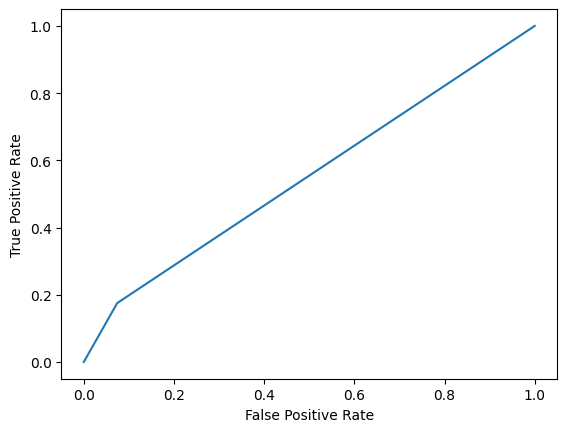

In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(df_test["bot"],test_preds)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [28]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(tweet_tfidf_train, df_train["bot"])

#Predict the response for test dataset
y_pred = clf.predict(tweet_tfidf_test)

In [30]:
accuracy_score(df_test["bot"],y_pred)

0.6923076923076923

In [31]:
import h2o
h2o.init()
from h2o.estimators.gbm import H2OGradientBoostingEstimator


h2o:1: DeprecationWarning: Your Python version is 3.11.2. The support for this version will be removed in H2O 3.42.0.1.


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "19.0.1" 2022-10-18; Java(TM) SE Runtime Environment (build 19.0.1+10-21); Java HotSpot(TM) 64-Bit Server VM (build 19.0.1+10-21, mixed mode, sharing)
  Starting server from /Users/sauravanchlia/SWM/BotDetectionUsingTransformers/bot/lib/python3.11/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/tmpec6fek3r
  JVM stdout: /var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/tmpec6fek3r/h2o_sauravanchlia_started_from_python.out
  JVM stderr: /var/folders/vx/c0vs5l7n3mb0v0mzrrq7hsb00000gn/T/tmpec6fek3r/h2o_sauravanchlia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Phoenix
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_sauravanchlia_8an4o4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [39]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(tweet_tfidf_train)

In [41]:
accuracy_score(df_train["bot"], y_km)

0.546875

In [ ]:
prostate_gbm = H2OGradientBoostingEstimator(nfolds = 5, seed = 1)
prostate_gbm.train(x=df_clean, y=label, training_frame=prostate)